# Chapter 4
## Damped Oscillations

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mplines

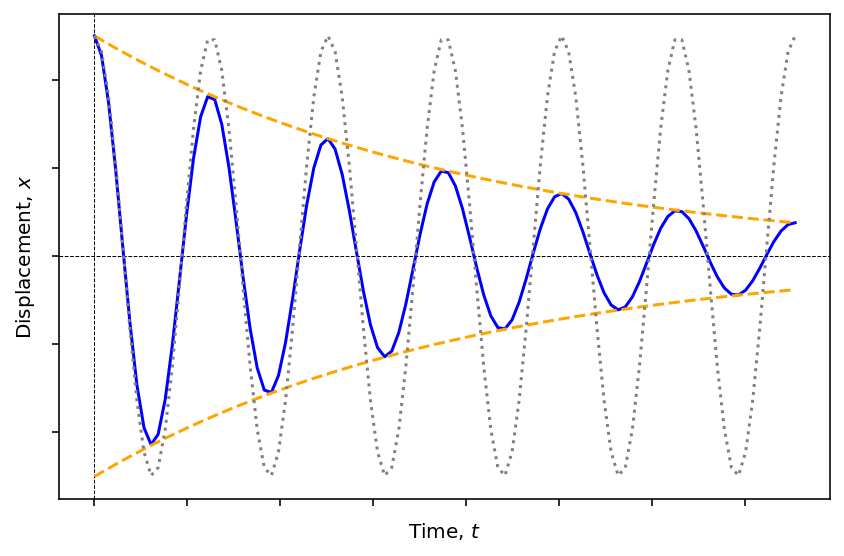

In [23]:
t = np.linspace(0,12*np.pi,100)
omega_1 = 1
delta_1 = 0
delta_2 = 3.14
A_0 = 5
tau = 10

def shm(thing, shift):
    x = A_0*np.cos(omega_1*thing + shift)
    return x

def damp(t):
    damp = np.exp(-t/(2*tau))
    return damp

#plt.xkcd(scale=5, length=3500, randomness=20)

fig = plt.figure()

ax = plt.axes()


ax.set_ylabel('Displacement, $x$')
ax.set_xlabel('Time, $t$')

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")
#plt.text(10, 4,'Phase shift, $\delta = $'+str(delta_2), ha="right", va="center", size=10)
ax.plot(t, shm(t,delta_1)*damp(t),color='blue')
ax.plot(t, A_0*damp(t),color='orange',linestyle='--')
ax.plot(t, -A_0*damp(t),color='orange',linestyle='--')
ax.plot(t, shm(t,delta_1),color='gray',linestyle='dotted')

ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')



plt.tight_layout()
#plt.savefig('relplot2.pdf',transparent=True)
#plt.title('Test')
plt.show()



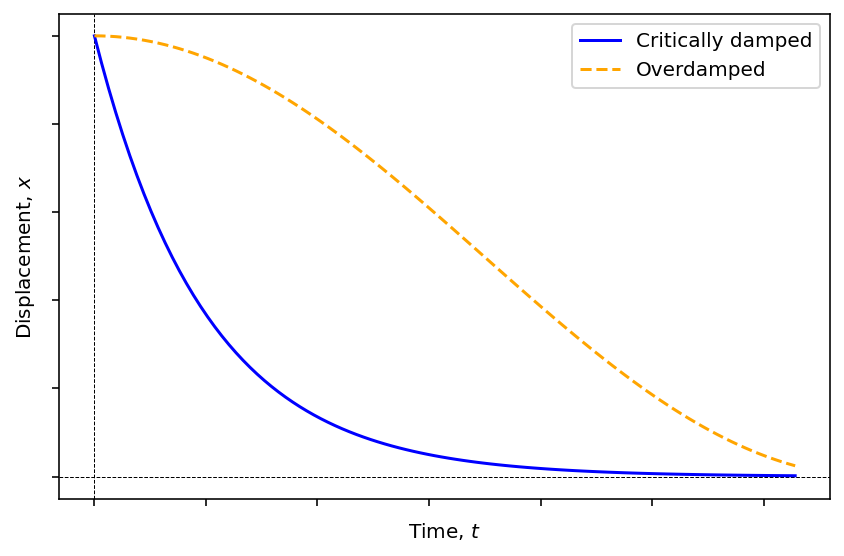

In [64]:
t = np.linspace(0,2*np.pi,100)
omega_0 = 1
delta_1 = 0
A_0 = 5
m = 1
b_c = 2*m*omega_0
tau = m/b
b = b_c


def omega_prime(w,damp):
        omega_prime = np.sqrt(w**2 - (0.5*damp/m)**2)
        return omega_prime

def damp_shm(thing, shift,w,damp):
    x = A_0*np.cos(omega_prime(w,damp)*thing + shift)*np.exp(-(t*damp)/(2*m))
    return x

def overdamp(thing,shift):
    x = 0.5*A_0*np.cos(0.45*thing+shift)+0.5*A_0
    return x

#plt.xkcd(scale=5, length=3500, randomness=20)

fig = plt.figure()

ax = plt.axes()


ax.set_ylabel('Displacement, $x$')
ax.set_xlabel('Time, $t$')

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")
#plt.text(10, 4,'Phase shift, $\delta = $'+str(delta_2), ha="right", va="center", size=10)
ax.plot(t, damp_shm(t,delta_1,omega_0,b),color='blue',label='Critically damped')
ax.plot(t, overdamp(t,delta_1),color='orange',linestyle='--',label='Overdamped')
#ax.plot(t, A_0*damp(t),color='orange',linestyle='--')
#ax.plot(t, -A_0*damp(t),color='orange',linestyle='--')
#ax.plot(t, shm(t,delta_1),color='gray',linestyle='dotted')

ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')


ax.legend()
plt.tight_layout()
#plt.savefig('relplot2.pdf',transparent=True)
#plt.title('Test')
plt.show()




# Chapter 5
## Forced oscillations


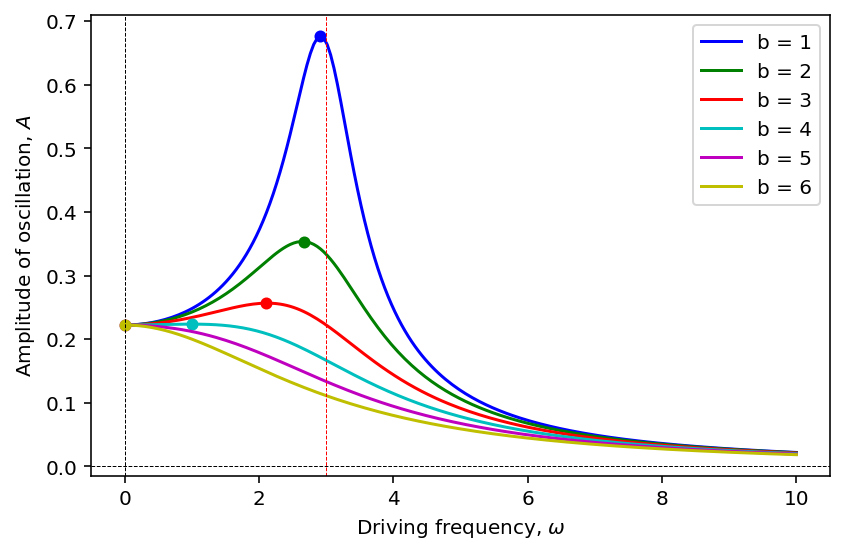

In [134]:
t = np.linspace(0,4*np.pi,200)
omega_0r = np.linspace(0,10,200)
b = np.arange(1,7)
m = 1
omega_0 = 3
omega_F = 1.5 # Forced oscillator frequency; usually just omega
F_0 = 2
omega_prime = np.sqrt(omega_0**2 - (0.5*b/m)**2)
#delta = np.arctan((b*omega_F )/(m*(omega_0**2 - omega_F**2)))

def amp_f(omega,damp):
    amp = F_0/(np.sqrt((m*(omega_0**2 - omega**2)**2)+(damp*omega)**2))
    return amp

def delta_f(omega,damp):
    delta = np.arctan((b*omega )/(m*(omega_0**2 - omega**2)))
    return delta

fig = plt.figure()

colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']

ax = plt.axes()

for n in b:
    ax.plot(omega_0r,amp_f(omega_0r,n),color=colors[n-1],label='b = '+str(n))
#    ax.plot(omega_0r,omega_0r*(amp_f(omega_0r,n))**2,color=colors[n-1],label='b = '+str(n)) #Power propto omega * A**2
    ax.plot(omega_0r[np.argmax(amp_f(omega_0r,n))],np.max(amp_f(omega_0r,n)),'o',color=colors[n-1],markersize=5)

    
#    ax.plot(x[sample_point],y[sample_point],'ro',markersize='10')


    
#ax.plot(omega_0r,amp_f(omega_0r,2*b),color='orange',label='Heavily damped, low Q')
ax.axvline(x=omega_0,linewidth=0.5,color='r',linestyle="--")

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")

ax.set_ylabel('Amplitude of oscillation, $A$')
ax.set_xlabel('Driving frequency, $\omega$')

#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')

ax.legend()
plt.tight_layout()
plt.show()


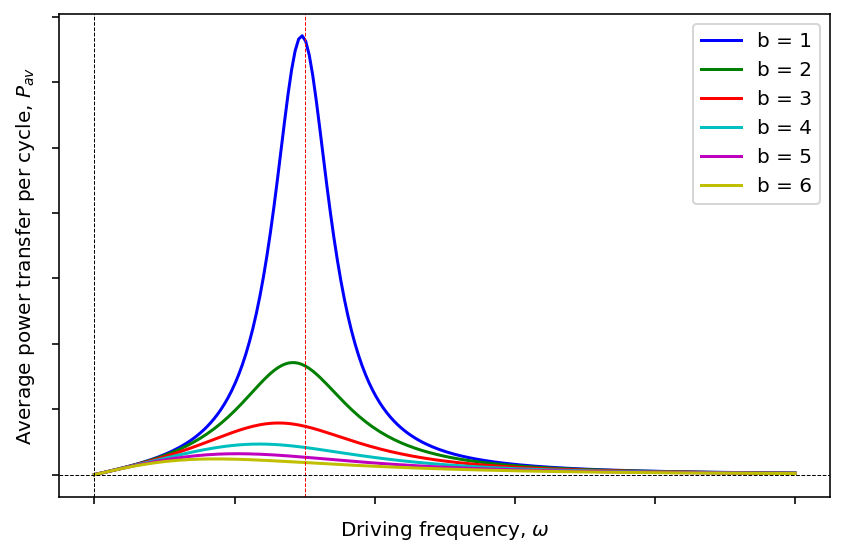

In [135]:
t = np.linspace(0,4*np.pi,200)
omega_0r = np.linspace(0,10,200)
b = np.arange(1,7)
m = 1
omega_0 = 3
omega_F = 1.5 # Forced oscillator frequency; usually just omega
F_0 = 2
omega_prime = np.sqrt(omega_0**2 - (0.5*b/m)**2)
#delta = np.arctan((b*omega_F )/(m*(omega_0**2 - omega_F**2)))

def amp_f(omega,damp):
    amp = F_0/(np.sqrt((m*(omega_0**2 - omega**2)**2)+(damp*omega)**2))
    return amp

def delta_f(omega,damp):
    delta = np.arctan((b*omega )/(m*(omega_0**2 - omega**2)))
    return delta

fig = plt.figure()

colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']

ax = plt.axes()

for n in b:
#    ax.plot(omega_0r,amp_f(omega_0r,n),color=colors[n-1],label='b = '+str(n))
    ax.plot(omega_0r,omega_0r*(amp_f(omega_0r,n))**2,color=colors[n-1],label='b = '+str(n)) #Power propto omega * A**2
#    ax.plot(omega_0r[np.argmax(amp_f(omega_0r,n))],np.max(amp_f(omega_0r,n)),'o',color=colors[n-1],markersize=5)

    
#    ax.plot(x[sample_point],y[sample_point],'ro',markersize='10')


    
#ax.plot(omega_0r,amp_f(omega_0r,2*b),color='orange',label='Heavily damped, low Q')
ax.axvline(x=omega_0,linewidth=0.5,color='r',linestyle="--")

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")

ax.set_ylabel('Average power transfer per cycle, $P_{av}$')
ax.set_xlabel('Driving frequency, $\omega$')

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.legend()
plt.tight_layout()
plt.show()



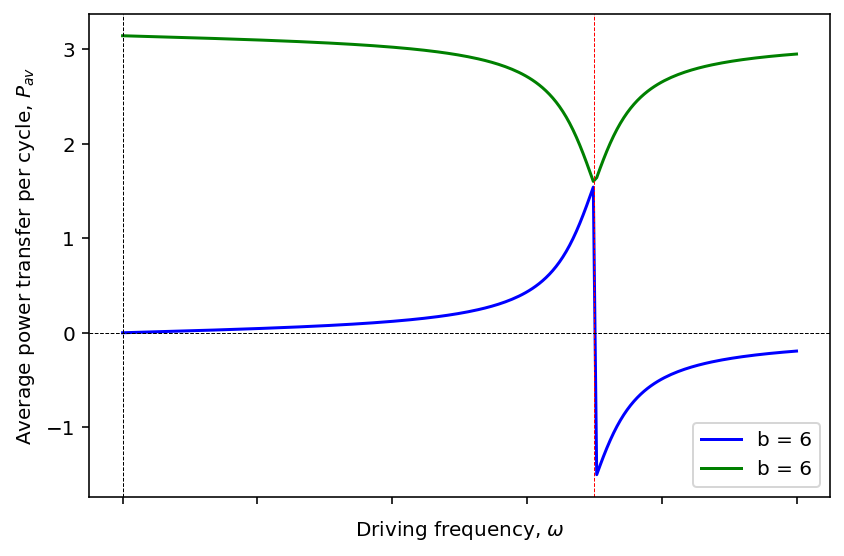

In [197]:
t = np.linspace(0,4*np.pi,200)
omega_0r = np.linspace(0,10,200)
b = np.arange(1,7)
m = 1
omega_0 = 7
omega_F = 1.5 # Forced oscillator frequency; usually just omega
F_0 = 2
omega_prime = np.sqrt(omega_0**2 - (0.5*b/m)**2)
#delta = np.arctan((b*omega_F )/(m*(omega_0**2 - omega_F**2)))

def amp_f(omega,damp):
    amp = F_0/(np.sqrt((m*(omega_0**2 - omega**2)**2)+(damp*omega)**2))
    return amp

def delta_f(omega,damp):
    delta = np.arctan((damp*omega )/(m*(omega_0**2 - omega**2)))
    return delta

fig = plt.figure()

colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']

ax = plt.axes()

#for n in b:
#    ax.plot(omega_0r,amp_f(omega_0r,n),color=colors[n-1],label='b = '+str(n))
#    ax.plot(omega_0r,omega_0r*(amp_f(omega_0r,n))**2,color=colors[n-1],label='b = '+str(n)) #Power propto omega * A**2
#    ax.plot(omega_0r[np.argmax(amp_f(omega_0r,n))],np.max(amp_f(omega_0r,n)),'o',color=colors[n-1],markersize=5)

    
#    ax.plot(x[sample_point],y[sample_point],'ro',markersize='10')

ax.plot(omega_0r,delta_f(omega_0r,1),color=colors[0],label='b = '+str(n))
ax.plot(omega_0r,np.pi-abs(delta_f(omega_0r,1)),color=colors[1],label='b = '+str(n))
    
#ax.plot(omega_0r,amp_f(omega_0r,2*b),color='orange',label='Heavily damped, low Q')
ax.axvline(x=omega_0,linewidth=0.5,color='r',linestyle="--")

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")

ax.set_ylabel('Average power transfer per cycle, $P_{av}$')
ax.set_xlabel('Driving frequency, $\omega$')

ax.set_xticklabels([])
#ax.set_yticklabels([])

ax.legend()
plt.tight_layout()
plt.show()




### Forced oscillator, special cases:

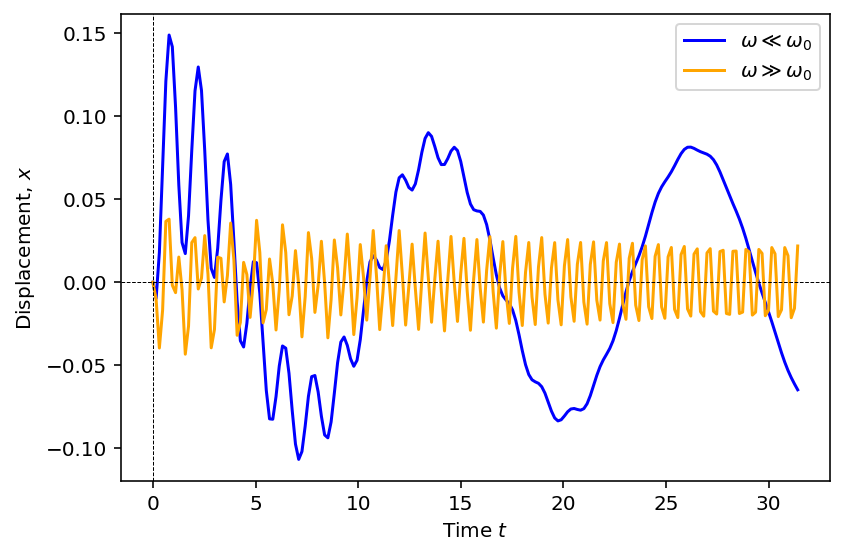

In [182]:
# 1. omega << omega 0

t = np.linspace(0,10*np.pi,200)
omega_0 = 5
omega_prime = 0.9*omega_0
omega_F = 0.1*omega_0

m = 1
b = 0.3
delta_F = 0.2*np.pi

def amp_f(omega,damp):
    amp = F_0/(np.sqrt((m*(omega_0**2 - omega**2)**2)+(damp*omega)**2))
    return amp

def displacement_x(omega, damp,t):
    x = amp_f(omega,damp)*(np.cos(omega*t - delta_F) - np.exp(-damp*t/(2*m))*np.cos(omega_prime*t - delta_F))
    return x

fig = plt.figure()

colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']

ax = plt.axes()

#for n in b:
#    ax.plot(omega_0r,amp_f(omega_0r,n),color=colors[n-1],label='b = '+str(n))
##    ax.plot(omega_0r,omega_0r*(amp_f(omega_0r,n))**2,color=colors[n-1],label='b = '+str(n)) #Power propto omega * A**2
#    ax.plot(omega_0r[np.argmax(amp_f(omega_0r,n))],np.max(amp_f(omega_0r,n)),'o',color=colors[n-1],markersize=5)
#
    
#    ax.plot(x[sample_point],y[sample_point],'ro',markersize='10')

ax.plot(t,displacement_x(omega_F,b,t),color='blue',label='$\omega \ll \omega_0$')
ax.plot(t,displacement_x(20*omega_F,b,t),color='orange',label='$\omega \gg \omega_0$')
#ax.plot(t,displacement_x(10*omega_F,b,t),color='red',label='$\omega \approx \omega_0$')




    
#ax.plot(omega_0r,amp_f(omega_0r,2*b),color='orange',label='Heavily damped, low Q')
#ax.axvline(x=omega_0,linewidth=0.5,color='r',linestyle="--")

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")

ax.set_ylabel('Displacement, $x$')
ax.set_xlabel('Time $t$')

#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')

ax.legend()
plt.tight_layout()
plt.show()



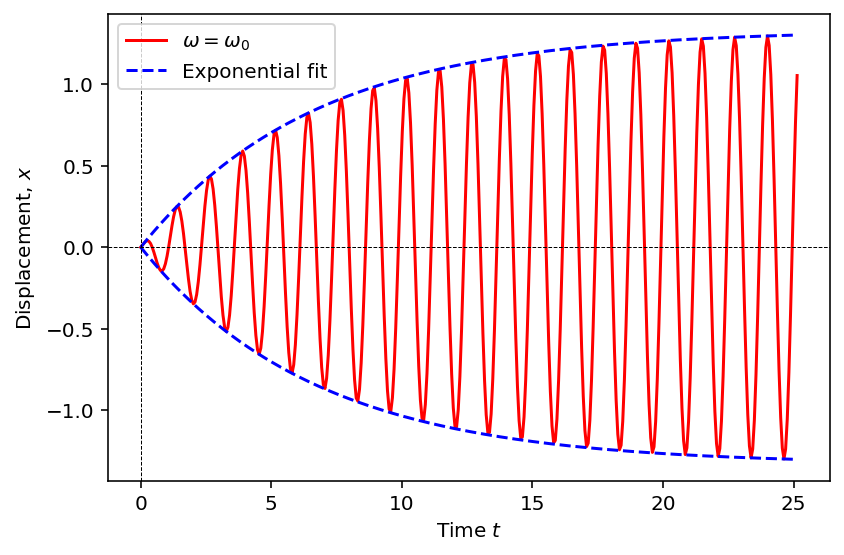

In [195]:
# 1. omega << omega 0

t = np.linspace(0,8*np.pi,400)
omega_0 = 5
omega_prime = 0.9*omega_0
omega_F = 0.1*omega_0

m = 1
b = 0.3
delta_F = 0.2*np.pi

def amp_f(omega,damp):
    amp = F_0/(np.sqrt((m*(omega_0**2 - omega**2)**2)+(damp*omega)**2))
    return amp

def displacement_x(damp,t):
    x = amp_f(omega_0,damp)*(np.cos(omega_0*t - delta_F)*(1 - np.exp(-damp*t/(2*m))))
    return x

def exp_fit(damp,t):
    fit = amp_f(omega_0,damp)*(1 - np.exp(-damp*t/(2*m)))
    return fit

fig = plt.figure()

colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']

ax = plt.axes()

#for n in b:
#    ax.plot(omega_0r,amp_f(omega_0r,n),color=colors[n-1],label='b = '+str(n))
##    ax.plot(omega_0r,omega_0r*(amp_f(omega_0r,n))**2,color=colors[n-1],label='b = '+str(n)) #Power propto omega * A**2
#    ax.plot(omega_0r[np.argmax(amp_f(omega_0r,n))],np.max(amp_f(omega_0r,n)),'o',color=colors[n-1],markersize=5)
#
    
#    ax.plot(x[sample_point],y[sample_point],'ro',markersize='10')

#ax.plot(t,displacement_x(omega_F,b,t),color='blue',label='$\omega \ll \omega_0$')
#ax.plot(t,displacement_x(20*omega_F,b,t),color='orange',label='$\omega \gg \omega_0$')
ax.plot(t,displacement_x(b,t),color='red',label='$\omega = \omega_0$')
ax.plot(t,exp_fit(b,t),color='blue',linestyle='--',label='Exponential fit')
ax.plot(t,-exp_fit(b,t),color='blue',linestyle='--')








    
#ax.plot(omega_0r,amp_f(omega_0r,2*b),color='orange',label='Heavily damped, low Q')
#ax.axvline(x=omega_0,linewidth=0.5,color='r',linestyle="--")

plt.axvline(x=0,linewidth=0.5,color='k',linestyle="--")
plt.axhline(y=0,linewidth=0.5,color='k',linestyle="--")

ax.set_ylabel('Displacement, $x$')
ax.set_xlabel('Time $t$')

#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.plot(t, shm(t,delta_2),color='orange')

ax.legend()
plt.tight_layout()
plt.show()


